In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('/workspaces/Learning-Machine-Learning/Datasets/Social_Network_Ads.csv')

In [10]:
df = df.iloc[:,2:]

In [12]:
df.sample(5)

,Age,EstimatedSalary,Purchased
378,41,87000,1
178,24,23000,0
108,26,86000,0
226,36,126000,1
19,48,29000,1


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis =1), df['Purchased'], test_size=0.3, random_state=0)

In [15]:
X_train.shape, X_test.shape

((280, 4), (120, 4))

### Standard Scaler

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Encode categorical features using pd.get_dummies
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align columns in case training/test differ
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


In [23]:
import pandas as pd

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [30]:
np.round(X_train.describe(),1)


,User ID,Age,EstimatedSalary
count,280.0,280.0,280.0
mean,15691781.7,37.9,69807.1
std,70759.6,10.2,34641.2
min,15569641.0,18.0,15000.0
25%,15628197.2,30.0,43000.0
50%,15694424.0,37.0,70500.0
75%,15751110.8,46.0,88000.0
max,15814816.0,60.0,150000.0


In [29]:
np.round(X_train_scaled.describe(),1)


,User ID,Gender,Age,EstimatedSalary
count,280.0,280.0,280.0,280.0
mean,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0
min,-1.7,-1.9,-1.6,-1.0
25%,-0.9,-0.8,-0.8,-1.0
50%,0.0,-0.1,0.0,1.0
75%,0.8,0.8,0.5,1.0
max,1.7,2.2,2.3,1.0


### Effect of Scaling

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Ensure only numeric columns are scaled
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

# Convert back to DataFrame with correct column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_cols, index=X_test.index)

# Optional: reattach categorical columns (if you want)
X_train_scaled = pd.concat([X_train_scaled, X_train.drop(num_cols, axis=1)], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test.drop(num_cols, axis=1)], axis=1)


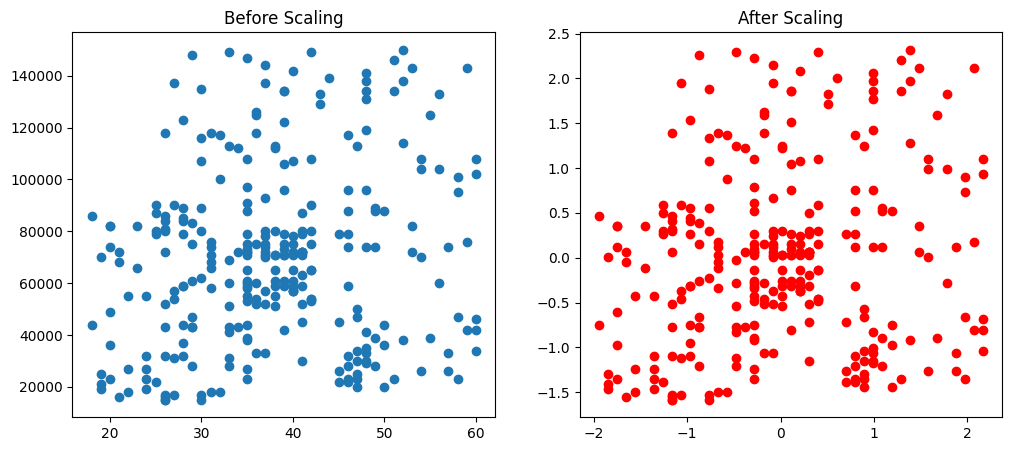

In [43]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='Red')
ax2.set_title('After Scaling')
plt.show()


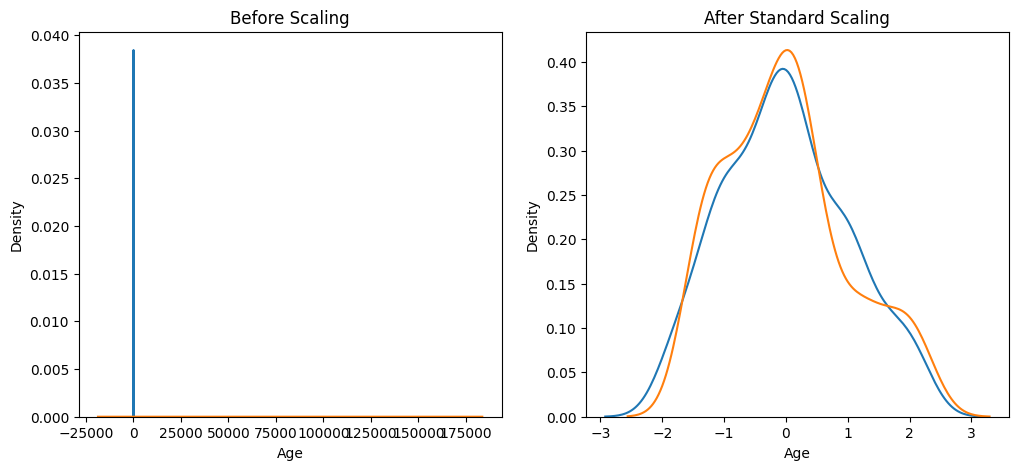

In [45]:


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()
